In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = df = pd.read_csv('data.csv')

In [4]:


# Define features and target variable
X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = df['Exited']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN model
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [5]:

# Get the predictions from KNN for both train and test sets
knn_train_predictions = knn_classifier.predict(X_train)
knn_test_predictions = knn_classifier.predict(X_test)

# Append KNN predictions as additional features to the original features
X_train_augmented = np.concatenate([X_train, knn_train_predictions.reshape(-1, 1)], axis=1)
X_test_augmented = np.concatenate([X_test, knn_test_predictions.reshape(-1, 1)], axis=1)

# Define the neural network model with additional KNN prediction feature
model = Sequential()
model.add(Dense(128, input_dim=X_train_augmented.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the neural network model with augmented features
model.fit(X_train_augmented, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model on the test set with augmented features
loss, accuracy = model.evaluate(X_test_augmented, y_test)
print("Accuracy:", accuracy)


Epoch 1/10
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.6715 - loss: 58.1426
Epoch 2/10
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7090 - loss: 1.2149
Epoch 3/10
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7616 - loss: 0.6775
Epoch 4/10
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7874 - loss: 0.5187
Epoch 5/10
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7865 - loss: 0.5187
Epoch 6/10
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7877 - loss: 0.5171
Epoch 7/10
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7873 - loss: 0.6769
Epoch 8/10
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7868 - loss: 0.5182
Epoch 9/10
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7866 - loss: 0.5186
Epoch 10/10
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7879 - loss: 0.5169
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 830us/step - accuracy: 0.7873 - loss: 0.5176
Accuracy: 0.7892871499061584


In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Predict probabilities for the test set
y_pred_probs = model.predict(X_test_augmented)

# Convert probabilities to binary predictions
y_pred = (y_pred_probs > 0.5).astype(int)

# Calculate precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 761us/step
Accuracy: 0.7892871209137455
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


Predicted Probabilities:
[[0.20651111]
 [0.20651111]
 [0.20651111]
 [0.20651111]
 [0.20651111]
 [0.20651111]
 [0.20651111]
 [0.20651111]
 [0.20651111]
 [0.20651111]]


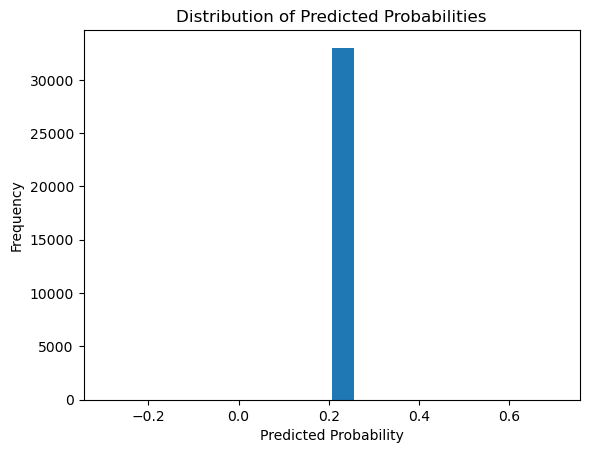

In [15]:
# Print the predicted probabilities for the first few samples
print("Predicted Probabilities:")
print(y_pred_probs[:10])  # Print probabilities for the first 10 samples

# Plot the distribution of predicted probabilities
import matplotlib.pyplot as plt

plt.hist(y_pred_probs, bins=20)  #  histogram
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()
